# Insurance_Cost_Prediction


### Context:-

### It is a supervised learning model that can predict the cost of premium for health insurance, i.e predict the continous data / numerical Value.

# Importing all the necessary libraries

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Loading the Dataset into the Dataframe

In [2]:
data = pd.read_csv("incopre.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Total no.of rows and columns

In [4]:
data.shape

(1338, 7)

#### In this dataset there are 1338 rows and 7 columns present

# Checking the types of data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking for duplicates

In [6]:
data.duplicated().sum()

1


#### Duplicates are not removed as the dataset is small and model needs more data.

# Checking for missing values

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values.

# Finding the unique values of each column

In [8]:
print("Age: ", data.age.unique())
print("Sex: ", data.sex.unique())
print("Children: ", data.children.unique())
print("Smoker: ", data.smoker.unique())
print("region: ", data.region.unique())

Age:  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Sex:  ['female' 'male']
Children:  [0 1 3 2 5 4]
Smoker:  ['yes' 'no']
region:  ['southwest' 'southeast' 'northwest' 'northeast']


# Converting Categorical data to Numerical data

In [9]:
enc = LabelEncoder()

In [10]:
data.sex = enc.fit_transform(data.sex) # Female 0 and Male 1
data.smoker = enc.fit_transform(data.smoker) # No 0 and Yes 1
data.region = enc.fit_transform(data.region) # Northeast 0, Northwest 1, Southeast 2, Southwest 3

#### In the Sex column we have taken Female as 0 and Male as 1.
#### In the Smoker column we have taken Yes as 1 and No as 0.
#### In the Region column we have taken Northeast as 0, northwest as 1, Southeast as 2, Southwest as 3.

In [11]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


# Statistical Information Describe

In [12]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### In this dataset there are total 1338 data points.
#### By Observing this dataset we have come to the conclusion that for age column maximum is 64 and minimum is 18 years.And Aveage is 39 years
#### In the Childern column maximum is 5 and minimum is 0 year
#### In the charges column we have maximum is 63770.42 and minimum is 1121.87 Dollars. And Average Charges is 13270.42 Dollars

# Finding the outliers in numerical data

In [13]:
# Function to identify the outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [14]:
print(len(findoutliers(data.age))) # Number of rows having outlier in age

0


In [15]:
print(len(findoutliers(data.bmi))) # Number of rows having outlier in bmi

9


#### For BMI there are 9 rows having outliers

In [16]:
print(len(findoutliers(data.children))) # Number of rows having outlier in children

0


<Axes: >

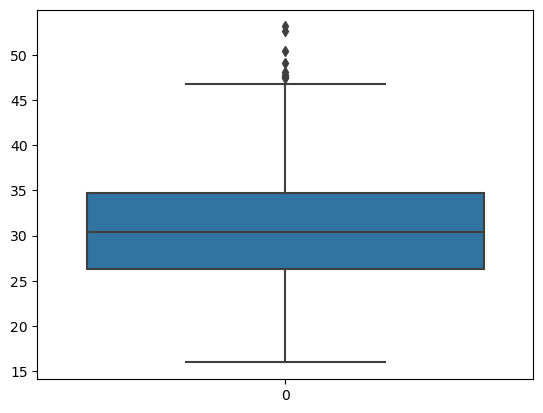

In [17]:
sns.boxplot(data.bmi) # Visualising bmi- outliers

#### Outliers are not removed as models like decision tree are not sensitive to outliers.

# Visualising Numerical Data

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

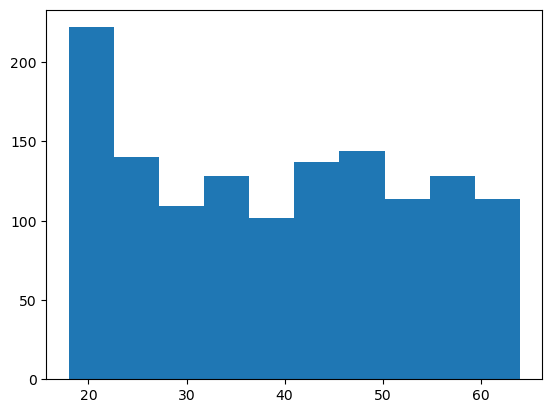

In [21]:
plt.hist(data.age) # Continuous data

#### The resulting plot shows bars representing the frequency or count of individuals falling into each age group.

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

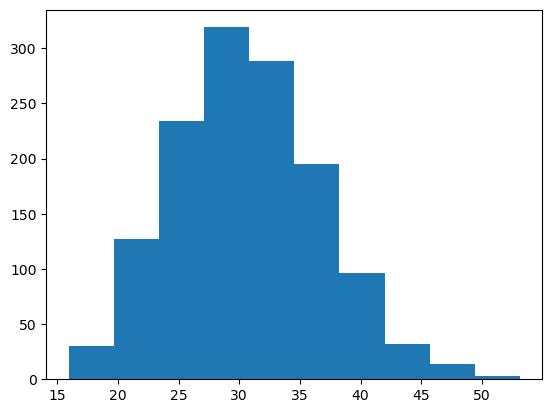

In [22]:
plt.hist(data.bmi) # Continuous data

#### The x-axis represents the BMI values, and the y-axis shows the frequency or count of occurrences for each BMI value. 

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

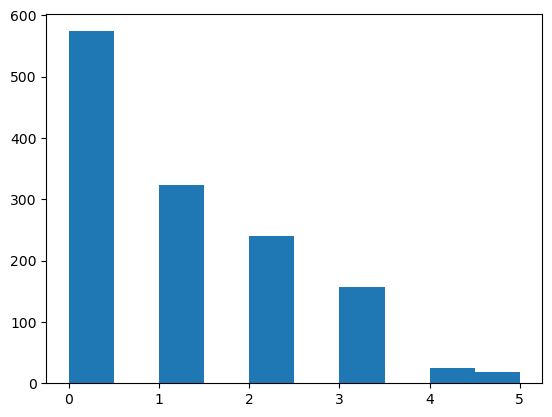

In [23]:
plt.hist(data.children) # Discrete data

####  The x-axis represents the number of children, and the y-axis shows the frequency or count of occurrences for each value.

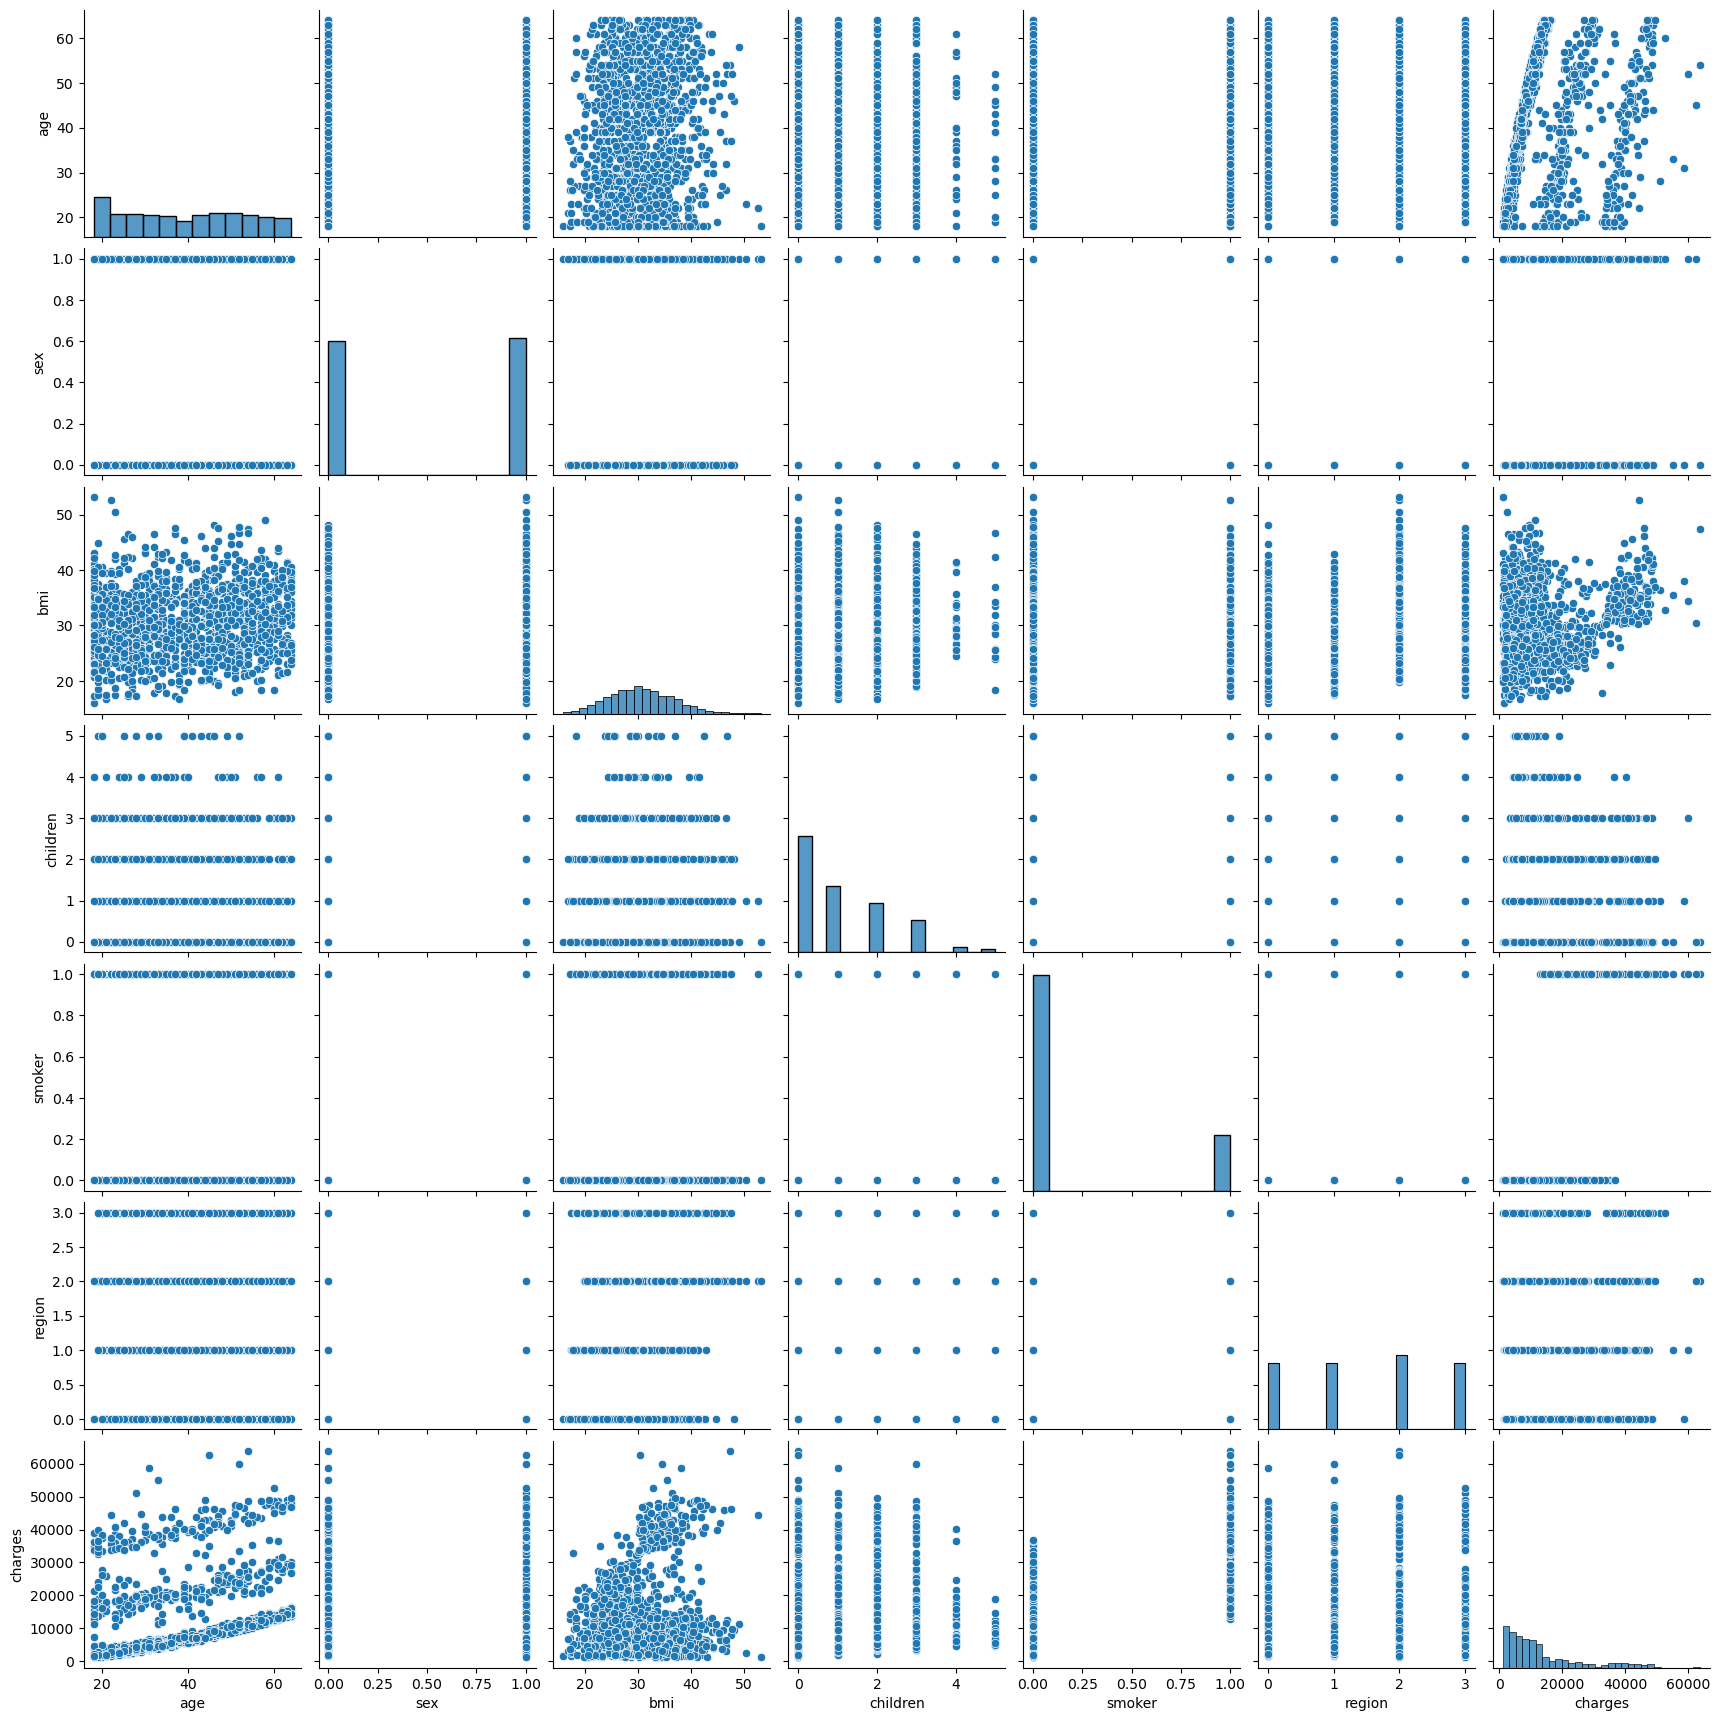

In [24]:
sns.pairplot(data)

# Analysing and visualising categorical data

In [26]:
SV=data.sex.value_counts() # Nominal data
SV

1    676
0    662
Name: sex, dtype: int64

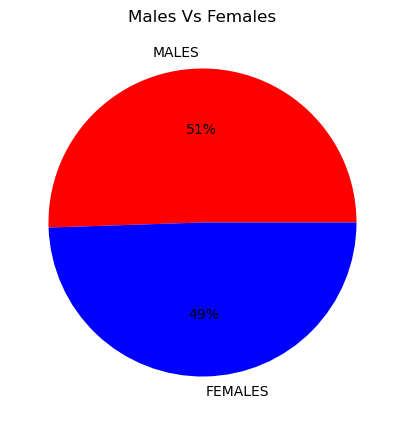

In [43]:
from matplotlib import rcParams
rcParams['figure.figsize']=5,5
plt.pie(SV,[0,0],colors=['red','blue'],labels=['MALES','FEMALES'],autopct='%1.0f%%')
plt.title('Males Vs Females')
plt.show()

#### There are 676 Males and 662 Females

In [35]:
SOV=data.smoker.value_counts() # Nominal data
SOV

0    1064
1     274
Name: smoker, dtype: int64

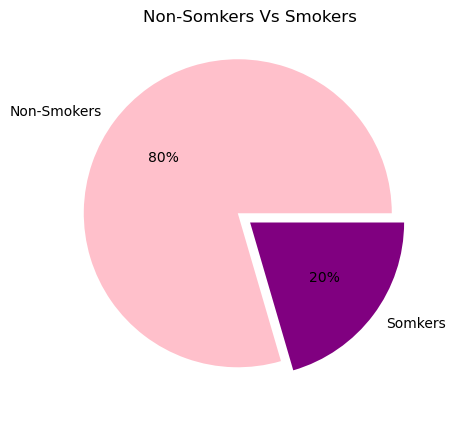

In [37]:
rcParams['figure.figsize']=5,5
plt.pie(SOV,[0.1,0],colors=['pink','purple'],labels=['Non-Smokers','Somkers'],autopct='%1.0f%%')
plt.title('Non-Somkers Vs Smokers')
plt.show()

#### There are 1064 Non-Smokers and 274 Smokers in this dataset.

In [38]:
RV=data.region.value_counts() # Norminal data
RV

2    364
3    325
1    325
0    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='Count'>

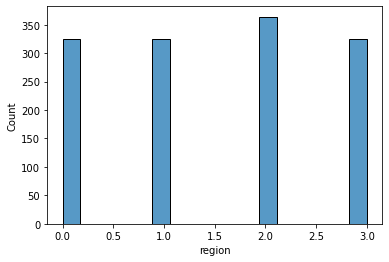

In [27]:
sns.histplot(data.region)

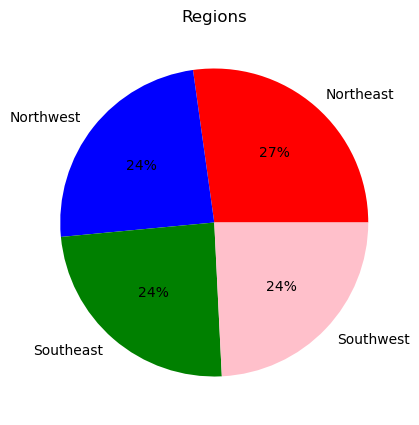

In [42]:
rcParams['figure.figsize']=5,5
plt.pie(RV,[0,0,0,0],colors=['red','blue','green','pink'],labels=['Northeast','Northwest','Southeast','Southwest'],autopct='%1.0f%%')
plt.title('Regions')
plt.show()

#### There are 324 peoples in Northeast, 325 peoples in Northwest, 325 peoples in Southeast and 364 peoples in Southwest

In [26]:
import warnings
warnings.filterwarnings('ignore')

# Checking the Normality of Data
###### AGE

In [28]:
print("Skewness of age: ", stats.skew(data.age))
print("Kurtosis of age: ", stats.kurtosis(data.age))

Skewness of age:  0.055610083072599126
Kurtosis of age:  -1.2449206804584227


#### Age is not normally distributed as the kurtosis of age is greater than -1.

###### SEX

In [29]:
print("Skewness of sex: ", stats.skew(data.sex))
print("Kurtosis of sex: ", stats.kurtosis(data.sex))

Skewness of sex:  -0.0209279020013669
Kurtosis of sex:  -1.999562022917821


#### Sex is not normally distributed as the kurtosis of sex is greater than -1.

###### BMI

In [30]:
print("Skewness of bmi: ", stats.skew(data.bmi))
print("Kurtosis of bmi: ", stats.kurtosis(data.bmi))

Skewness of bmi:  0.28372857291709386
Kurtosis of bmi:  -0.05502310583700032


#### BMI is normally distributed.

###### CHILDREN

In [31]:
print("Skewness of children: ", stats.skew(data.children))
print("Kurtosis of children: ", stats.kurtosis(data.children))

Skewness of children:  0.9373281163874423
Kurtosis of children:  0.1972174268623732


#### Children is normally distributed.

###### SMOKER

In [32]:
print("Skewness of smoker: ", stats.skew(data.smoker))
print("Kurtosis of smoker: ", stats.kurtosis(data.smoker))

Skewness of smoker:  1.4631235340273212
Kurtosis of smoker:  0.1407304758245984


#### Smoker is nomally distributed.

###### REGION

In [33]:
print("Skewness of region: ", stats.skew(data.region))
print("Kurtosis of region: ", stats.kurtosis(data.region))

Skewness of region:  -0.038057781143998944
Kurtosis of region:  -1.327226577401974


#### Region is not normally distributed as the kurtosis of region is greater than -1.

# Checking the Correlation with Dependent Variable

In [34]:
data.corrwith(data.charges)

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
dtype: float64

In [35]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


# Heatmap

<Axes: >

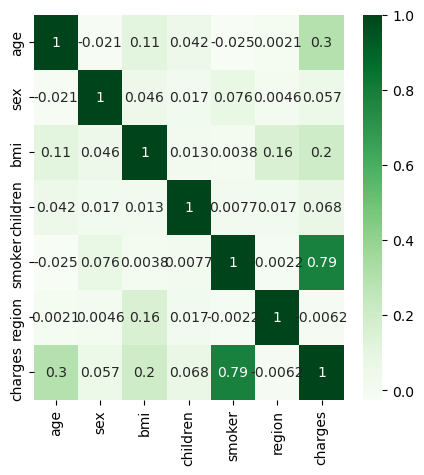

In [121]:
corr = data.corr()
sns.heatmap(corr, cmap = 'Greens', annot= True)

- Age has weak positive correlation with charges.
- Sex has weak positive correlation with charges. 
- BMI has weak positive correlation with charges. 
- Children has weak positive correlation with charges. 
- Smoker has strong positive correlation with charges. 
- Region has negative correlation (Almost Zero Correlation) with charges. 

# Feature Scaling (Using MinMaxScaler)

In [37]:
scaler = MinMaxScaler()
data[['age','bmi','sex','children','smoker']]=scaler.fit_transform(data[['age','bmi','sex','children','smoker']])

#### In MinMaxScaler we range the data between 0 to 1.
#### The fit_transform method of the MinMaxScaler is used to compute the minimum and maximum values of each column and then scale the values to the range [0, 1]. The transformed values are then assigned back to the corresponding columns in the 'data' DataFrame.
#### After this process, the numerical columns 'age', 'bmi', 'children', and other similar features will be scaled to a range between 0 and 1, making them suitable for machine learning algorithms that can benefit from scaled input features. Scaling the features helps prevent certain features from dominating others, especially when they are measured on different scales.

In [38]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,3,16884.92400
1,0.000000,1.0,0.479150,0.2,0.0,2,1725.55230
2,0.217391,1.0,0.458434,0.6,0.0,2,4449.46200
3,0.326087,1.0,0.181464,0.0,0.0,1,21984.47061
4,0.304348,1.0,0.347592,0.0,0.0,1,3866.85520
5,0.282609,0.0,0.263115,0.0,0.0,2,3756.62160
6,0.608696,0.0,0.470272,0.2,0.0,2,8240.58960
7,0.413043,0.0,0.316922,0.6,0.0,1,7281.50560
8,0.413043,1.0,0.373150,0.4,0.0,0,6406.41070
9,0.913043,0.0,0.265806,0.0,0.0,1,28923.13692


# Defining Independent (X) and Dependent (y)

In [45]:
X = data.iloc[:,:-1]
y = data.charges

#### After these operations, we will have 'X', which contains all the input features for the model, and 'y', which contains the corresponding target values.

In [46]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


#### We have removed region Column beacuse it has almost no correlation with charges

In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Spliting the data into training and testing data

In [48]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42)

# Linear Regression

In [49]:
model_lr = LinearRegression()

#### Linear regression is commonly used statistical technique for modeling the relationship between a dependent variable (target) and one or more independent variables (features) in a linear manner.

## Training the model

In [50]:
model_lr.fit(x_train,y_train)

LinearRegression()

## Testing the model

In [51]:
y_predict_lr = model_lr.predict(x_test)

#### After executing this line of code, y_predict_lr will contain the predicted values for the target variable, corresponding to the input features in x_test. These predicted values can then be compared to the actual target values (y_test) to evaluate the performance of the linear regression model on the test data. This evaluation helps to understand how well the model generalizes to unseen data and how accurate its predictions are.

In [52]:
r2_lr = r2_score(y_test,y_predict_lr)
r2_lr

0.7694415927057693

#### The 'r2_score(y_test, y_predict_lr)' function compares the actual target values (y_test) with the predicted target values (y_predict_lr) and computes the R-squared score. r2_score indicates how perfectly the model predicts the target values

In [53]:
mse_lr = mean_squared_error(y_test,y_predict_lr)
mse_lr

33805466.898688614

#### The lower the MSE, the better the model's predictions align with the actual target values, indicating better performance.

# Ridge Regression

In [54]:
model_rr = Ridge()

#### Ridge regression is a variant of linear regression that includes L2 regularization to prevent overfitting and is useful when dealing with multicollinearity (high correlation) between the input features, as it can stabilize the model and provide more robust predictions and improve the model's generalization to unseen data.

## Training the model

In [55]:
model_rr.fit(x_train,y_train)

Ridge()

## Testing the model

In [56]:
y_predict_rr = model_rr.predict(x_test)

In [57]:
r2_rr = r2_score(y_test,y_predict_rr)
r2_rr

0.7692081844141473

In [58]:
mse_rr = mean_squared_error(y_test,y_predict_rr)
mse_rr

33839690.22790445

# Lasso Regression

In [59]:
model_ll = Lasso()

#### Lasso regression is particularly useful when dealing with datasets containing many features, as it can help select the most important features and exclude less relevant ones, leading to a more interpretable and simpler model. By introducing the L1 regularization term, Lasso regression encourages some coefficients to become exactly zero, effectively performing feature selection and creating sparse models.

## Training the model

In [60]:
model_ll.fit(x_train,y_train)

Lasso()

## Testing the model

In [61]:
y_predict_ll = model_ll.predict(x_test)

In [62]:
r2_ll = r2_score(y_test,y_predict_ll)
r2_ll

0.7694413409990981

In [63]:
mse_ll = mean_squared_error(y_test,y_predict_ll)
mse_ll

33805503.805005066

# Support Vector Regression

In [64]:
model_sv = SVR(kernel='rbf')

#### SVR is a type of regression algorithm that uses Support Vector Machines (SVM) to perform regression tasks. The kernel='rbf' parameter specifies the radial basis function (RBF) kernel, which is a popular kernel used in SVR for non-linear regression tasks.SVR is useful for regression tasks when the data has non-linear relationships between the input features and the target variable.

## Training the model

In [65]:
model_sv.fit(x_train,y_train)

SVR()

## Testing the model

In [66]:
y_predict_sv = model_sv.predict(x_test)

In [67]:
r2_sv = r2_score(y_test,y_predict_sv)
r2_sv

-0.08171487174467051

In [68]:
mse_sv = mean_squared_error(y_test,y_predict_sv)
mse_sv

158605694.4083457

# Decision Tree Regressor

In [69]:
model_dt = DecisionTreeRegressor(random_state=0)

#### The decision tree works by making decisions at each node based on specific features' values, effectively segmenting the data into different regions. The target variable's prediction for a new data point is determined by the mean (or median) value of the training samples within the same leaf node to which the data point belongs.The random_state=0 parameter sets the random state to 0, which ensures that the same random sequence is used each time you run the code. This ensures reproducibility of the results.

## Training the model

In [70]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

## Testing the model

In [71]:
y_predict_dt = model_dt.predict(x_test)

In [72]:
r2_dt = r2_score(y_test,y_predict_dt)
r2_dt

0.7254745170764243

In [73]:
Adj_r2 = 1 - (1-r2_dt) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.7242369867251535

In [74]:
mse_dt = mean_squared_error(y_test,y_predict_dt)
mse_dt

40252108.93297002

# Random Forest

In [75]:
model_rf = RandomForestRegressor()

#### Random Forest Regression builds multiple decision trees on different subsets of the data and features, and then combines their predictions to produce more accurate and robust results.The key idea behind the Random Forest algorithm is to reduce overfitting and improve prediction accuracy by aggregating the predictions of individual decision trees. By averaging the predictions from multiple trees, Random Forest can handle non-linear relationships between the input features and the target variable, and it is less prone to overfitting compared to individual decision trees.



## Training the model

In [76]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

## Testing the model

In [77]:
y_predict_rf = model_rf.predict(x_test)

In [78]:
r2_rf = r2_score(y_test,y_predict_rf)
r2_rf

0.8525738024702179

In [79]:
Adj_r2 = 1 - (1-r2_rf) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.8519092215647492

In [80]:
mse_rf = mean_squared_error(y_test,y_predict_rf)
mse_rf

21616264.17826704

# Model Evaluation

In [85]:
MSE = [mse_lr,mse_rr,mse_ll,mse_sv,mse_dt,mse_rf]
R2_Score = [r2_lr,r2_rr,r2_ll,r2_sv,r2_dt,r2_rf]
Models = ['Linear Regression', ' Ridge Regression' , ' Lasso Regression', 'Support Vector Machine',
          'Decision Tree', 'Random Forest']

# Mean Squared Error Comparison Chart

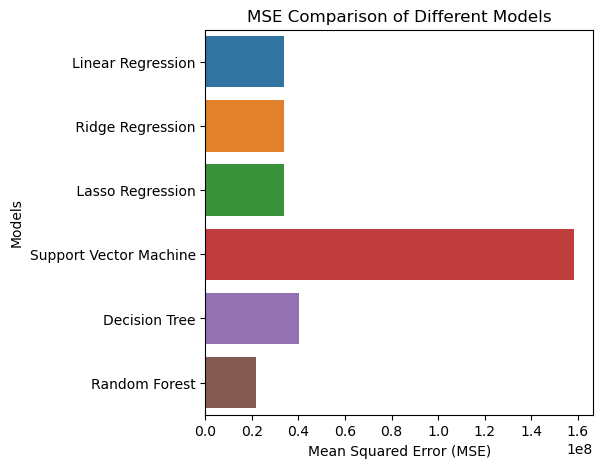

In [86]:
import seaborn as sns
sns.barplot(x=MSE, y=Models)
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Models')
plt.title('MSE Comparison of Different Models')
plt.show()

# R2 Score Comparison Chart

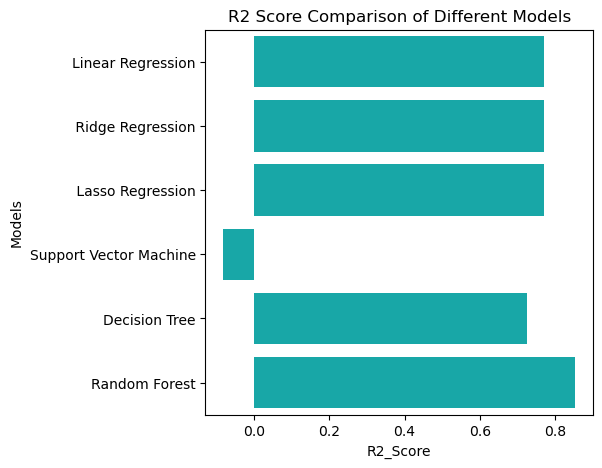

In [87]:
sns.barplot(x=R2_Score, y=Models, color="c")
plt.xlabel('R2_Score')
plt.ylabel('Models')
plt.title('R2 Score Comparison of Different Models')
plt.show()

#### From the charts it can be seen that the Mean Squared Error is lowest for Random Forest and the R2 Score is highest for Random Forest. Therefore, we can conclude that Random Forest is the best algorithm for this data. 

# Hyperparameter Tuning (Using Grid Search on Random Forest)

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
parameters = {'max_depth':[10,30,200],
              'random_state': [0,1,10,14,20,27],
              'max_features':['int','float','auto','sqrt','log2','None']}

grid = GridSearchCV(model_rf,parameters,cv=5,verbose=1)
grid.fit(X,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=35, max_features='sqrt',
                                             random_state=1),
             param_grid={'max_depth': [10, 30, 200],
                         'max_features': ['int', 'float', 'auto', 'sqrt',
                                          'log2', 'None'],
                         'random_state': [0, 1, 10, 14, 20, 27]},
             verbose=1)

In [105]:
grid.best_score_

0.845896268315878

In [106]:
grid.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'random_state': 20}

# Hyperparameter Tuning (Using Randomized Search on Random Forest)

In [107]:
parameters = {'max_depth':[25,30,35],
              'random_state':[0,1,2,3,4],
              'max_features':['int','float','sqrt','None','auto','log2']}
grid = RandomizedSearchCV(model_rf,parameters,cv=5)
grid.fit(X,y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=35,
                                                   max_features='sqrt',
                                                   random_state=1),
                   param_distributions={'max_depth': [25, 30, 35],
                                        'max_features': ['int', 'float', 'sqrt',
                                                         'None', 'auto',
                                                         'log2'],
                                        'random_state': [0, 1, 2, 3, 4]})

In [108]:
grid.best_score_

0.8400724881561559

In [109]:
grid.best_params_

{'random_state': 3, 'max_features': 'sqrt', 'max_depth': 25}

# Training Random Forest Regressor With Best Parameters

In [110]:
model_rf = RandomForestRegressor(max_depth=35,max_features='sqrt',random_state=1)
model_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=35, max_features='sqrt', random_state=1)

# Testing Decision Tree With Best Parameters

In [111]:
y_predict_rf = model_rf.predict(x_test)

In [112]:
r2_dt = r2_score(y_test,y_predict_rf)
r2_dt

0.8542766307767229

In [113]:
Adj_r2 = 1 - (1-r2_rf) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.8519092215647492

# K-Fold Cross-Validation

In [114]:
scores =cross_val_score(model_rf,X,y,cv=5)

#### It is used to perform cross-validation, which is a technique for evaluating the model's performance by splitting the data into multiple subsets (folds) and training/evaluating the model on different combinations of these subsets.
#### 'cv=5': This parameter specifies the number of folds in the cross-validation process. In this case, cv=5 means that the data will be divided into 5 folds, and the model will be trained and evaluated 5 times, each time using a different fold as the test set and the rest as the training set.
#### After executing the code, the scores variable will contain an array of evaluation scores, with one score for each fold. These scores represent the model's performance on each fold during cross-validation. Cross-validation helps provide a more reliable estimate of the model's performance and generalization ability on unseen data

In [115]:
scores

array([0.8585543 , 0.78272198, 0.86511582, 0.83801131, 0.8495773 ])

In [116]:
scores.mean()

0.8387961419174605

In [117]:
scores.std() # Standard Deviation is less than 0.05

0.029476335219965302

#### Project Analysis

Machine learning algorithms can predict the cost of the premium for health insurance. The cost of the premium for health insurance varies from person to person. For example, a smoker is charged higher premium than a non-smoker. Companies calculate the premium for each person based on few factors like age, bmi, smoker etc. It is possible to predict the premium cost using machine learning algorithms. We can train a machine learning algorithm using the past data to predict the premium cost and make a model. 

The size of dataset is 1338 records. It contained 7 columns, out of which six of them was independent variable and one was dependent variable. The data was labeled so we can do supervised learning algorithms. As the dependent variable is continuous numerical value this is a regression problem. The data contains no missing values but it does contain outliers. 

However, some machine learning algorithms like decision tree and random forest are not sensitive to outliers, therefore we have not removed the outliers. The variables have good correlation except for regions. The variables like bmi, children and smoker are normally distributed but the others are not. Feature scaling using min-max scaler was done to give all features equal importance and scale them in the range of 0 to 1. Different ml algorithms were trained using the dataset and tested. 

Random Forest gave the best r2 score of 85.25% and adjusted r2 score of 85.19% as well both are close enough but has difference in them .According to the theory the r2 score is greater than adjusted r2 score i,e (Adjusted R2 is always less than or equal to R2) shows good model.

We also use hyperparameter tuning on Random forest using GridSearchCV that gives 84.58% and RandomizedSearchCV that gives 84.00% that is less than the normal Random Forest .

We trained the Decision tree Algorithm again with best parameters.The r2 score increased to 85.43% and adjusted r2 score was 85.20%. Again it shows r2 score is greater than the adjusted r2 score. 

At the last we conclued that Decision Tree Algorithm shows the best accuracy/performace among all the others algorithm for this model.